In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process.kernels import Matern

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler


C:\Users\somondal\AppData\Local\Temp\ipykernel_4464\2689324858.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Classification'].iloc[mt]= 'Norm_Up'
C:\Users\somondal\AppData\Local\Temp\ipykernel_4464\2689324858.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Norm_Up' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data1['Classification'].iloc[mt]= 'Norm_Up'


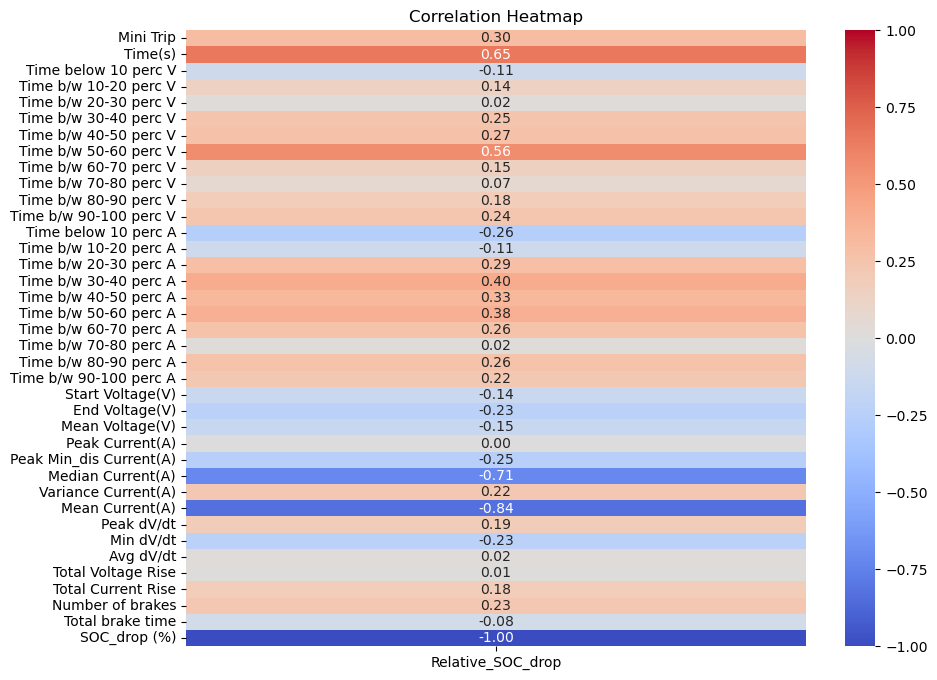

In [355]:
%run Database_create.ipynb

In [356]:
vel_agg_11= pd.read_excel(r'drivecycles/agg1/speed_DR_75188.xlsx')
vel_agg_12= pd.read_excel(r'drivecycles/agg1/speed_DR_75053.xlsx')
vel_agg_13= pd.read_excel(r'drivecycles/agg1/speed_DR_74866.xlsx')
vel_agg_14= pd.read_excel(r'drivecycles/agg1/speed_DR_74789.xlsx')
vel_agg_21= pd.read_excel(r'drivecycles/agg2/speed_DR_4716.xlsx')
vel_agg_22= pd.read_excel(r'drivecycles/agg2/speed_DR_74705.xlsx')
vel_agg_23= pd.read_excel(r'drivecycles/agg2/speed_DR_4839.xlsx')
vel_agg_24= pd.read_excel(r'drivecycles/agg2/speed_DR_4840.xlsx')
##vel_nor_11= pd.read_excel(r'drivecycles/nor1/speed_DR_74428.xlsx')
vel_nor_11= pd.read_excel(r'drivecycles/nor1/speed_DR_14634.xlsx')
vel_nor_12= pd.read_excel(r'drivecycles/nor1/speed_DR_74517.xlsx')
vel_nor_13= pd.read_excel(r'drivecycles/nor1/speed_DR_74594.xlsx')
vel_nor_14= pd.read_excel(r'drivecycles/nor1/speed_DR_74670.xlsx')
vel_nor_21= pd.read_excel(r'drivecycles/nor2/speed_DR_74765.xlsx')
vel_nor_22= pd.read_excel(r'drivecycles/nor2/speed_DR_4832.xlsx')
vel_nor_23= pd.read_excel(r'drivecycles/nor2/speed_DR_74674.xlsx')
vel_nor_24= pd.read_excel(r'drivecycles/nor2/speed_DR_74389.xlsx')

In [357]:
vel_list=[]
vel_list.extend([vel_agg_11, vel_agg_12, vel_agg_13, vel_agg_14, 
                 vel_agg_11, vel_agg_12, vel_agg_13, vel_agg_14, 
                 vel_agg_11, vel_agg_12, vel_agg_13, vel_agg_14,
                 vel_agg_21, vel_agg_22, vel_agg_23, vel_agg_24,
                 vel_agg_21, vel_agg_22, vel_agg_23, vel_agg_24, 
                 vel_agg_21, vel_agg_22, vel_agg_23, vel_agg_24, 
                 vel_nor_11, vel_nor_12, vel_nor_13, vel_nor_14, 
                 vel_nor_11, vel_nor_12, vel_nor_13, vel_nor_14, 
                 vel_nor_11, vel_nor_12, vel_nor_13, vel_nor_14, 
                 vel_nor_21, vel_nor_22, vel_nor_23, vel_nor_24, 
                 vel_nor_21, vel_nor_22, vel_nor_23, vel_nor_24, 
                 vel_nor_21, vel_nor_22, vel_nor_23, vel_nor_24, 
                 vel_agg_11, vel_agg_12, vel_agg_13, vel_agg_14, 
                 vel_agg_11, vel_agg_12, vel_agg_13, vel_agg_14, 
                 vel_agg_11, vel_agg_12, vel_agg_13, vel_agg_14,
                 vel_agg_21, vel_agg_22, vel_agg_23, vel_agg_24,
                 vel_agg_21, vel_agg_22, vel_agg_23, vel_agg_24, 
                 vel_agg_21, vel_agg_22, vel_agg_23, vel_agg_24, 
                 vel_nor_11, vel_nor_12, vel_nor_13, vel_nor_14, 
                 vel_nor_11, vel_nor_12, vel_nor_13, vel_nor_14, 
                 vel_nor_11, vel_nor_12, vel_nor_13, vel_nor_14, 
                 vel_nor_21, vel_nor_22, vel_nor_23, vel_nor_24, 
                 vel_nor_21, vel_nor_22, vel_nor_23, vel_nor_24, 
                 vel_nor_21, vel_nor_22, vel_nor_23, vel_nor_24
                ])

In [358]:
vel_dict={}
for v_d in range (1,97):
    vel_dict[v_d]= vel_list[v_d-1]

In [359]:
#vel_dict

In [360]:
vel_info= pd.DataFrame({'Mini_trip': range(1, 97)})

# Add the 'SOC_drop (%)' column to vel_info DataFrame
vel_info['SOC_drop (%)'] = info_data_2['SOC_drop (%)']

In [361]:
#vel_list

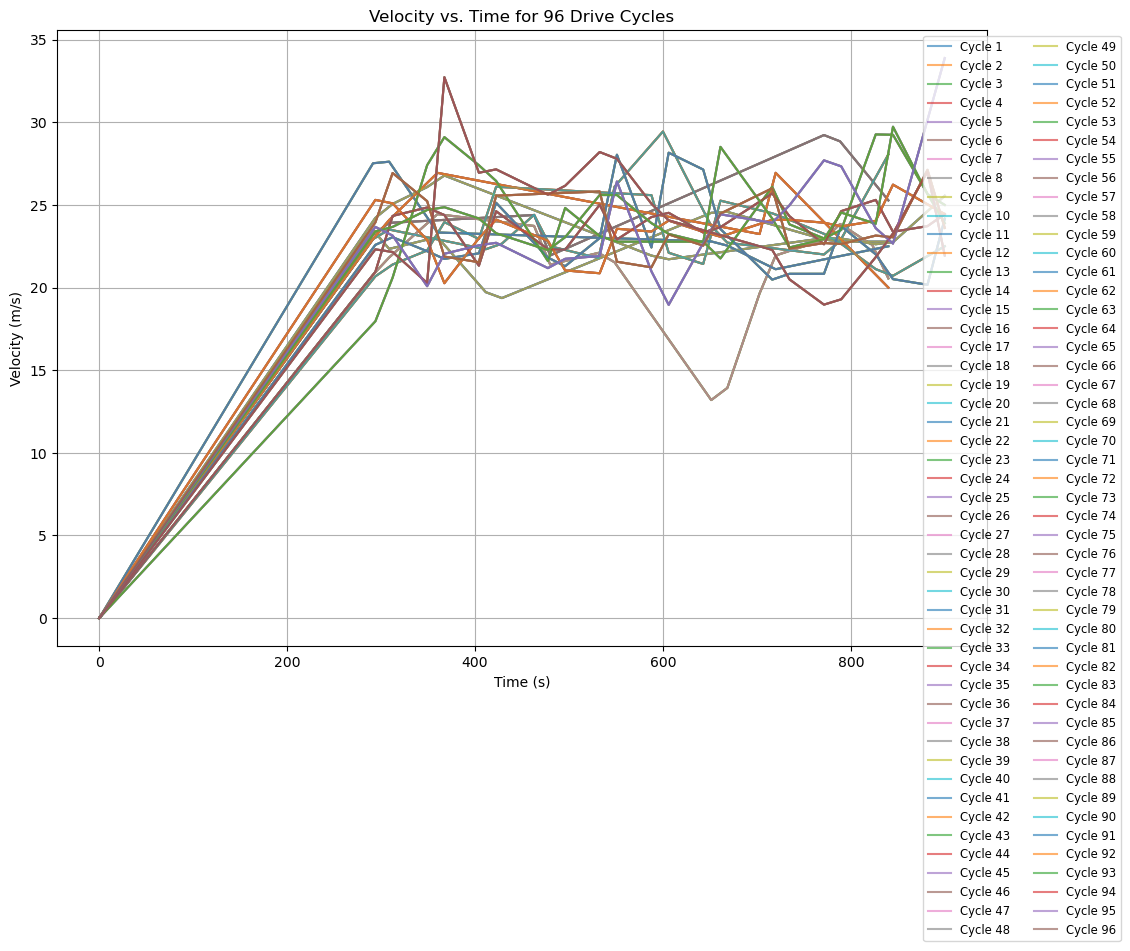

In [362]:
# Plot all drive cycles to visually check the variation of velocity
plt.figure(figsize=(12, 8))

for key in vel_dict:
    timeseries = vel_dict[key]
    plt.plot(timeseries["time"], timeseries["speed"], label=f"Cycle {key}", alpha=0.6)

plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity vs. Time for 96 Drive Cycles")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0), ncol=2, fontsize='small')
plt.grid(True)
plt.show()

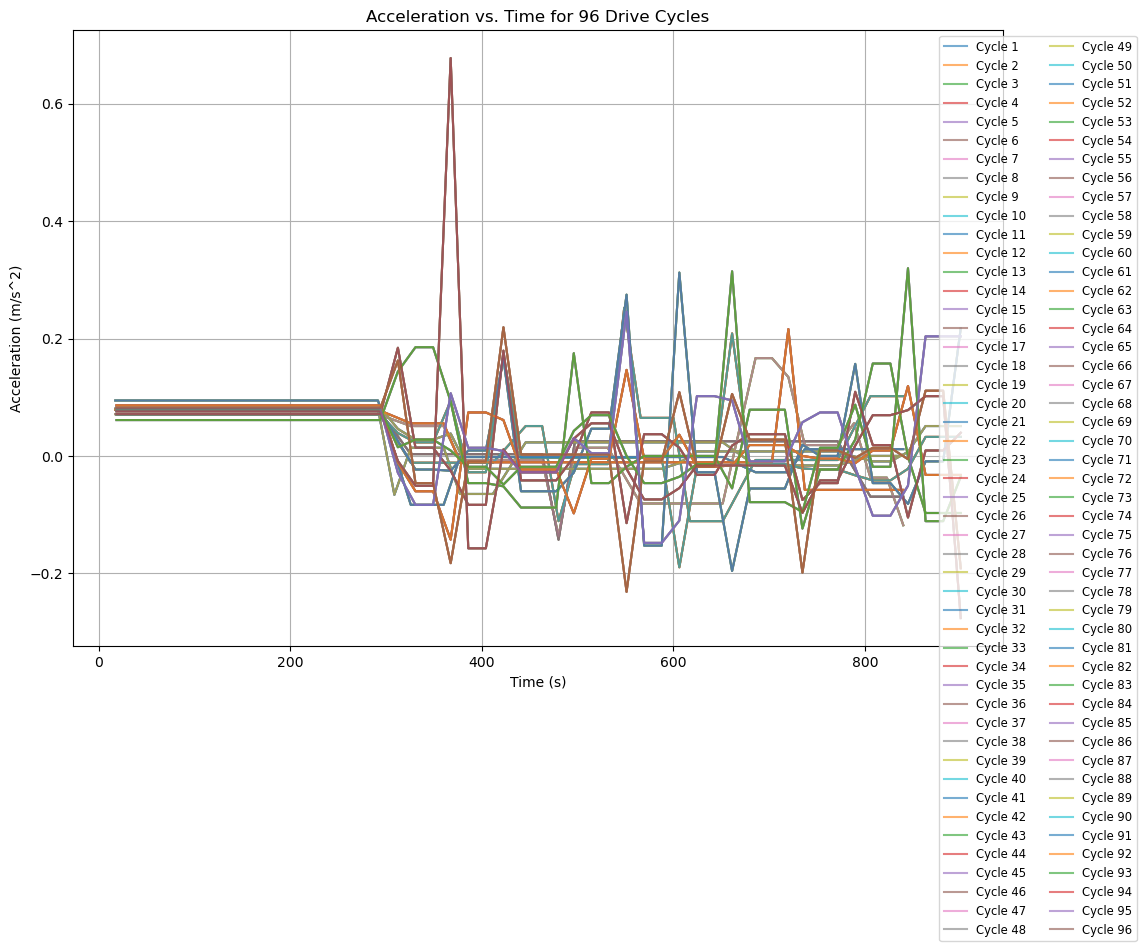

In [363]:
# Calculate acceleration and plot all drive cycles
plt.figure(figsize=(12, 8))

for key in vel_dict:
    timeseries = vel_dict[key]
    timeseries['acceleration'] = timeseries["speed"].diff() / timeseries["time"].diff()
    plt.plot(timeseries["time"], timeseries["acceleration"], label=f"Cycle {key}", alpha=0.6)

plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.title("Acceleration vs. Time for 96 Drive Cycles")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0), ncol=2, fontsize='small')
plt.grid(True)
plt.show()

In [364]:
### Feature extraction from the input velocity files

def extract_max_speed(timeseries):
    max_speed = timeseries["speed"].max()
    return max_speed

def extract_mean_speed(timeseries):
    mean_speed = timeseries["speed"].mean()
    return mean_speed

# Higher variability in velocity means higher std(standard deviation) often suggests 
# more aggressive or incocnsistent driving patterns, which may lead to higher consumptions
def extract_std_speed(timeseries):
    std_speed = timeseries["speed"].std()
    return std_speed

# Calculate the total distance traveled using the trapezoidal rule for integration
def extract_total_distance(timeseries):
    total_distance = np.trapz(timeseries["speed"], timeseries["time"])
    return total_distance

# Calculate mean, max, min, and standard deviation of acceleration.
def extract_acceleration_metrics(timeseries):
    timeseries['acceleration'] = timeseries["speed"].diff() / timeseries["time"].diff()
    mean_acceleration = timeseries['acceleration'].mean()
    max_acceleration = timeseries['acceleration'].max()
    min_acceleration = timeseries['acceleration'].min()
    std_acceleration = timeseries['acceleration'].std()
    return mean_acceleration, max_acceleration, min_acceleration, std_acceleration

# Calculate the total time spent accelerating.
def extract_time_spent_accelerating(timeseries):
    timeseries['acceleration'] = timeseries["speed"].diff() / timeseries["time"].diff()
    time_spent_accelerating = (timeseries['acceleration'] > 0).sum() * timeseries['time'].diff().mean()
    return time_spent_accelerating
    
# Calculate the total time spent decelerating.
def extract_time_spent_decelerating(timeseries):
    timeseries['acceleration'] = timeseries["speed"].diff() / timeseries["time"].diff()
    time_spent_decelerating = (timeseries['acceleration'] < 0).sum() * timeseries['time'].diff().mean()
    return time_spent_decelerating

# Extract the maximum deceleration from the timeseries.
def extract_max_deceleration(timeseries):
    timeseries['acceleration'] = timeseries["speed"].diff() / timeseries["time"].diff()
    max_deceleration = timeseries['acceleration'].min()
    return max_deceleration

# Extract the mean deceleration from the timeseries.
def extract_mean_deceleration(timeseries):
    timeseries['acceleration'] = timeseries["speed"].diff() / timeseries["time"].diff()
    mean_deceleration = timeseries[timeseries['acceleration'] < 0]['acceleration'].mean()
    return mean_deceleration
    
##Count the total number of stops (speed = 0).
# def extract_total_number_of_stops(timeseries):
#     Count the total number of stops (speed = 0).
#     total_number_of_stops = (timeseries["speed"] == 0).sum()
#     return total_number_of_stops

# def extract_duration_of_stops(timeseries):
#     """Calculate the total duration of stops."""
#     duration_of_stops = (timeseries["speed"] == 0).sum() * timeseries['time'].diff().mean()
#     return duration_of_stops


# Count the number of speed peaks in the timeseries.
def extract_number_of_speed_peaks(timeseries):
    number_of_speed_peaks = ((timeseries["speed"].diff().shift(-1) < 0) & (timeseries["speed"].diff() > 0)).sum()
    return number_of_speed_peaks

# Calculate the average speed during speed peaks.
def extract_average_speed_during_peaks(timeseries):
    peak_speeds = timeseries["speed"][(timeseries["speed"].diff().shift(-1) < 0) & (timeseries["speed"].diff() > 0)]
    average_speed_during_peaks = peak_speeds.mean()
    return average_speed_during_peaks

# Calculate the distance covered during speed peaks using the trapezoidal rule for integration.
def extract_distance_covered_during_peaks(timeseries):
    peak_times = timeseries["time"][(timeseries["speed"].diff().shift(-1) < 0) & (timeseries["speed"].diff() > 0)]
    distance_covered_during_peaks = np.trapz(peak_times)
    return distance_covered_during_peaks

# Extract the maximum drop in speed from the timeseries.
def extract_max_speed_drop(timeseries):
    max_speed_drop = timeseries["speed"].diff().min()
    return max_speed_drop

# Calculate the total duration of speed drops.
def extract_duration_of_speed_drops(timeseries):
    duration_of_speed_drops = (timeseries["speed"].diff() < 0).sum() * timeseries['time'].diff().mean()
    return duration_of_speed_drops

# Calculate the variance of the speed from the timeseries.
def extract_speed_variance(timeseries):
    speed_variance = timeseries["speed"].var()
    return speed_variance

# Count the number of accelerations in the timeseries.
def extract_number_of_accelerations(timeseries):
    timeseries['acceleration'] = timeseries["speed"].diff() / timeseries["time"].diff()
    number_of_accelerations = (timeseries['acceleration'] > 0).sum()
    return number_of_accelerations

# Count the number of decelerations in the timeseries.
def extract_number_of_decelerations(timeseries):
    timeseries['acceleration'] = timeseries["speed"].diff() / timeseries["time"].diff()
    number_of_decelerations = (timeseries['acceleration'] < 0).sum()
    return number_of_decelerations

def find_time(timeseries):
    time= timeseries['time'].iloc[-1]
    return time

In [365]:
# Function to featurize a single velocity timeseries
def featurize_velocity(timeseries):
    features = {}
    
    # Speed unit: m/s, and accelerations : m^2/s
    features['time (s)'] = find_time(timeseries)
    features['max_speed'] = extract_max_speed(timeseries)
    features['mean_speed'] = extract_mean_speed(timeseries)
    features['std_speed'] = extract_std_speed(timeseries)
    features['total_distance'] = extract_total_distance(timeseries)
    mean_accel, max_accel, min_accel, std_accel = extract_acceleration_metrics(timeseries)
    features['mean_acceleration'] = mean_accel
    features['max_acceleration'] = max_accel
    features['min_acceleration'] = min_accel
    features['std_acceleration'] = std_accel
    features['time_spent_accelerating'] = extract_time_spent_accelerating(timeseries)
    features['time_spent_decelerating'] = extract_time_spent_decelerating(timeseries)
    features['max_deceleration'] = extract_max_deceleration(timeseries)
    features['mean_deceleration'] = extract_mean_deceleration(timeseries)
    # features['total_number_of_stops'] = extract_total_number_of_stops(timeseries)
    # features['duration_of_stops'] = extract_duration_of_stops(timeseries)
    features['number_of_speed_peaks'] = extract_number_of_speed_peaks(timeseries)
    features['average_speed_during_peaks'] = extract_average_speed_during_peaks(timeseries)
    features['distance_covered_during_peaks'] = extract_distance_covered_during_peaks(timeseries)
    features['max_speed_drop'] = extract_max_speed_drop(timeseries)
    features['duration_of_speed_drops'] = extract_duration_of_speed_drops(timeseries)
    features['speed_variance'] = extract_speed_variance(timeseries)

    features['number_of_accelerations'] = extract_number_of_accelerations(timeseries)  # count
    features['number_of_decelerations'] = extract_number_of_decelerations(timeseries)  # count
    
    return features

In [366]:
# Initialize an empty list to store feature dictionaries
all_features = []

# Loop through the dictionary of DataFrames and extract features for each one
for key in vel_dict:
    timeseries = vel_dict[key]
    features = featurize_velocity(timeseries)
    features['Mini_trip'] = key  # Add Mini_trip information
    all_features.append(features)

# Convert the list of feature dictionaries to a DataFrame
vel_info = pd.DataFrame(all_features)
vel_info['Total Velocity Drop(m/s)']= vel_drop_arr
vel_info['Total Velocity Drop time (s)']= vel_drop_time
vel_info['Velocity drop per unit time (m/s^2)']= vel_info['Total Velocity Drop(m/s)']/vel_info['Total Velocity Drop time (s)']
# Add 'SOC_drop (%)' from velocity_SOC.csv
vel_info['SOC_drop (%)'] = info_data_2['SOC_drop (%)']
# Rename columns with corrosponding unit in a formal format
vel_info.rename(columns={
    'max_speed': 'Max Speed (m/s)',
    'mean_speed': 'Mean Speed (m/s)',
    'std_speed': 'Speed Std Dev (m/s)',
    'total_distance': 'Total Distance (m)',
    'mean_acceleration': 'Mean Acceleration (m/s^2)',
    'max_acceleration': 'Max Acceleration (m/s^2)',
    'min_acceleration': 'Min Acceleration (m/s^2)',
    'std_acceleration': 'Acceleration Std Dev (m/s^2)',
    'time_spent_accelerating': 'Time Spent Accelerating (s)',
    'time_spent_decelerating': 'Time Spent Decelerating (s)',
    'max_deceleration': 'Max Deceleration (m/s^2)',
    'mean_deceleration': 'Mean Deceleration (m/s^2)',
    # 'total_number_of_stops': 'Total Number of Stops',
    # 'duration_of_stops': 'Duration of Stops (s)',
    'number_of_speed_peaks': 'Number of Speed Peaks',
    'average_speed_during_peaks': 'Average Speed During Peaks (m/s)',
    'distance_covered_during_peaks': 'Distance Covered During Peaks (m)',
    'max_speed_drop': 'Max Speed Drop (m/s)',
    'duration_of_speed_drops': 'Duration of Speed Drops (s)',
    'speed_variance': 'Speed Variance (m^2/s^2)',
    'number_of_accelerations': 'Number of Accelerations',
    'number_of_decelerations': 'Number of Decelerations'
}, inplace=True)

# Set the 'Mini_trip' as the index for convinence to track each features of each drive cycle
vel_info.set_index('Mini_trip', inplace=True)

# Display the DataFrame for visual checking
vel_info

,time (s),Max Speed (m/s),Mean Speed (m/s),Speed Std Dev (m/s),Total Distance (m),Mean Acceleration (m/s^2),Max Acceleration (m/s^2),Min Acceleration (m/s^2),Acceleration Std Dev (m/s^2),Time Spent Accelerating (s),...,Distance Covered During Peaks (m),Max Speed Drop (m/s),Duration of Speed Drops (s),Speed Variance (m^2/s^2),Number of Accelerations,Number of Decelerations,Total Velocity Drop(m/s),Total Velocity Drop time (s),Velocity drop per unit time (m/s^2),SOC_drop (%)
Mini_trip,,,,,,,,,,,,,,,,,,,,,
1,840.0,24.444444,17.249127,6.950897,14608.775510,0.024471,0.166667,-0.136574,0.068439,548.571429,...,1105.714286,-2.341270,291.428571,48.314969,32,17,11.964286,240.000000,0.049851,-1.714187
2,840.0,29.230159,20.384339,8.074758,17255.623583,0.030093,0.079630,-0.142747,0.048128,754.285714,...,617.142857,-2.447090,85.714286,65.201713,44,5,2.447090,17.142857,0.142747,-2.191082
3,840.0,24.583333,18.583254,6.860774,15733.265306,0.027116,0.080556,-0.066204,0.045849,582.857143,...,840.000000,-1.134921,205.714286,47.070225,34,12,4.825397,85.714286,0.056296,-1.941562
4,840.0,29.444444,19.446032,7.584416,16427.551020,0.033399,0.252315,-0.111111,0.067934,497.142857,...,917.142857,-1.904762,342.857143,57.523371,29,20,11.250000,342.857143,0.032813,-2.052681
5,840.0,24.444444,17.249127,6.950897,14608.775510,0.024471,0.166667,-0.136574,0.068439,548.571429,...,1105.714286,-2.341270,291.428571,48.314969,32,17,11.964286,240.000000,0.049851,-1.626870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,900.0,27.125850,19.912982,7.343440,18070.595585,0.026235,0.219136,-0.231481,0.087318,642.857143,...,4050.000000,-4.251701,257.142857,53.926116,35,14,14.484127,238.775510,0.060660,-2.146716
93,900.0,29.733560,20.129252,7.561723,18256.455643,0.027778,0.319753,-0.111111,0.085448,514.285714,...,2057.142857,-2.040816,367.346939,57.179648,28,20,16.360544,495.918367,0.032990,-2.351125
94,900.0,32.732426,19.795125,7.892918,17977.665556,0.024383,0.677778,-0.276235,0.123222,495.918367,...,1910.204082,-5.073696,404.081633,62.298159,27,22,10.241875,440.816327,0.023234,-2.222724


In [367]:
vel_info.to_csv('velocity_data.csv', index= False)

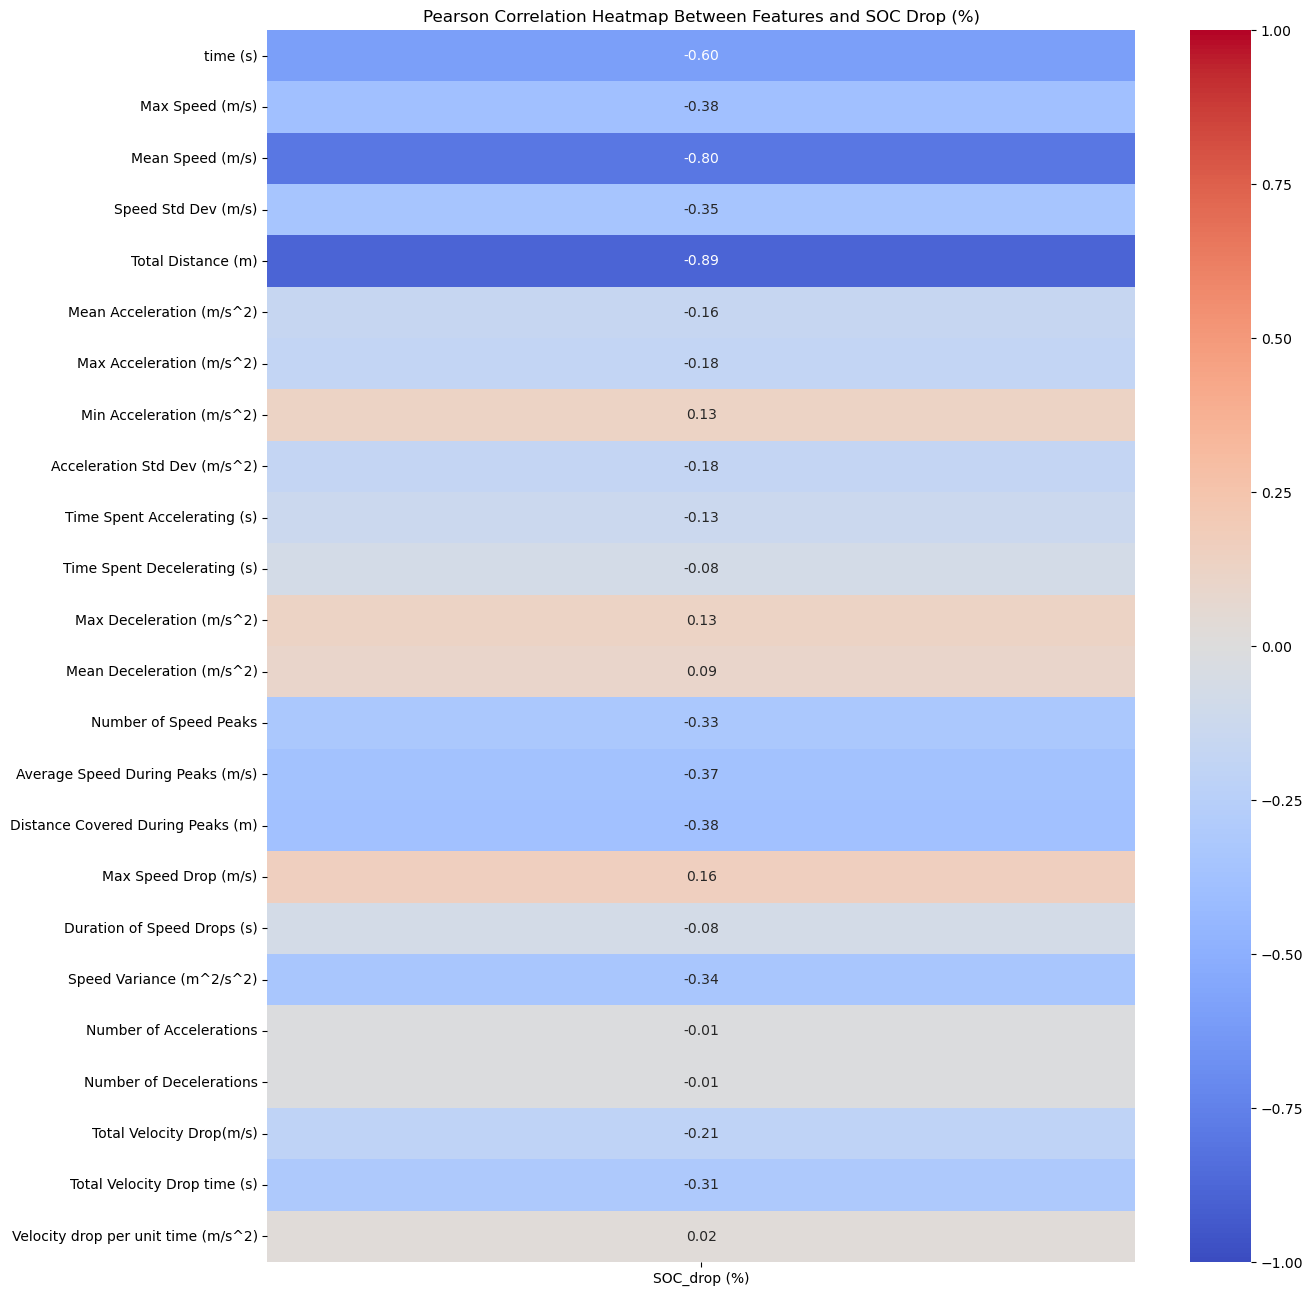

In [368]:
# Compute the Pearson correlation matrix and set the 'SOC_drop (%)' as the target variable
corr_matrix = vel_info.corr()

# Select the correlations with 'SOC_drop (%)' (excluding self-correlation)
target_corr = corr_matrix[['SOC_drop (%)']].drop(['SOC_drop (%)'], axis=0)

# Plot the heatmap for the target variable correlations
plt.figure(figsize=(14, 16))
sns.heatmap(target_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap Between Features and SOC Drop (%)')
plt.show()


In [369]:
## Machine Learning


In [370]:
## Regression ML models

def linear_regression(df):
    # Splitting the dataset
    X = df.drop(columns=['SOC_drop (%)'])
    y = df['SOC_drop (%)']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)
    
    # Scaling the dataset
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initializing and training the model
    linear_model = LinearRegression()
    linear_model.fit(X_train_scaled, y_train)
    
    # Making predictions
    y_pred_train = linear_model.predict(X_train_scaled)
    y_pred_test = linear_model.predict(X_test_scaled)
    
    # Evaluating the model
    mae_linear = mean_absolute_error(y_test, y_pred_test)
    mape_linear = mean_absolute_percentage_error(y_test, y_pred_test)
    
    print('MAE:', mae_linear)
    print('MAPE:', mape_linear)
    
    # Plotting predicted vs real values
    plt.figure()
    plt.scatter(y_pred_test, y_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='C2')
    plt.xlabel('Predicted SOC_drop (%)')
    plt.ylabel('Real SOC_drop (%)')
    plt.title('Linear Regression: Predicted vs Real SOC_drop (%)')
    plt.show()
    
    return linear_model, mape_linear

## KNN regression ML model
def knn_regression(df):
    # Splitting the dataset
    X = df.drop(columns=['SOC_drop (%)'])
    y = df['SOC_drop (%)']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scaling the dataset
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Hyperparameter tuning
    param_grid = {
        'n_neighbors': range(1, 10),
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
    }
    skf = KFold(n_splits=5, random_state=10, shuffle=True)

    grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=skf, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)
    
    # Training the model with the best parameters
    knn_model = grid_search.best_estimator_
    knn_model.fit(X_train_scaled, y_train)
    
    # Making predictions
    y_pred_train = knn_model.predict(X_train_scaled)
    y_pred_test = knn_model.predict(X_test_scaled)
    
    # Evaluating the model
    mae_knn = mean_absolute_error(y_test, y_pred_test)
    mape_knn = mean_absolute_percentage_error(y_test, y_pred_test)
    
    print('MAE:', mae_knn)
    print('MAPE:', mape_knn)
    
    # Plotting predicted vs real values
    plt.figure()
    plt.scatter(y_pred_test, y_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='C2')
    plt.xlabel('Predicted SOC_drop (%)')
    plt.ylabel('Real SOC_drop (%)')
    plt.title('KNN Regression: Predicted vs Real SOC_drop (%)')
    plt.show()
    
    return knn_model, mape_knn

## Decision_tree regression ML model
def decision_tree_regression(df):
    # Splitting the dataset
    X = df.drop(columns=['SOC_drop (%)'])
    y = df['SOC_drop (%)']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scaling the dataset
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Hyperparameter tuning
    param_grid = {
        'max_depth': [None, 10, 20, 50],
        'min_samples_split': [2, 5, 10]
    }

    grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)
    
    # Training the model with the best parameters
    decision_tree_model = grid_search.best_estimator_
    decision_tree_model.fit(X_train_scaled, y_train)
    
    # Making predictions
    y_pred_train = decision_tree_model.predict(X_train_scaled)
    y_pred_test = decision_tree_model.predict(X_test_scaled)
    
    # Evaluating the model
    mae_dt = mean_absolute_error(y_test, y_pred_test)
    mape_dt = mean_absolute_percentage_error(y_test, y_pred_test)
    
    print('MAE:', mae_dt)
    print('MAPE:', mape_dt)
    
    # Plotting predicted vs real values
    plt.figure()
    plt.scatter(y_pred_test, y_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='C2')
    plt.xlabel('Predicted SOC_drop (%)')
    plt.ylabel('Real SOC_drop (%)')
    plt.title('Decision Tree Regression: Predicted vs Real SOC_drop (%)')
    plt.show()
    
    return decision_tree_model, mape_dt


## Decision_tree regression ML model
def random_forest_regression(df):
    # Splitting the dataset
    X = df.drop(columns=['SOC_drop (%)'])
    y = df['SOC_drop (%)']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scaling the dataset
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Hyperparameter tuning
    param_grid = {
        'n_estimators': [580, 600, 620],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5]
    }

    grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)
    
    # Training the model with the best parameters
    rf_model = grid_search.best_estimator_
    rf_model.fit(X_train_scaled, y_train)
    
    # Making predictions
    y_pred_train = rf_model.predict(X_train_scaled)
    y_pred_test = rf_model.predict(X_test_scaled)
    
    # Evaluating the model
    mae_rf = mean_absolute_error(y_test, y_pred_test)
    mape_rf = mean_absolute_percentage_error(y_test, y_pred_test)
    
    print('MAE:', mae_rf)
    print('MAPE:', mape_rf)
    
    # Plotting predicted vs real values
    plt.figure()
    plt.scatter(y_pred_test, y_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='C2')
    plt.xlabel('Predicted SOC_drop (%)')
    plt.ylabel('Real SOC_drop (%)')
    plt.title('Random Forest Regression: Predicted vs Real SOC_drop (%)')
    plt.show()
    
    return rf_model, mape_rf


## Gaussian_process regression ML model
def gaussian_process_regression(df):
    # Splitting the dataset
    X = df.drop(columns=['SOC_drop (%)'])
    y = df['SOC_drop (%)']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scaling the dataset
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define the parameter grid for hyperparameter tuning
    param_grid = {
        'alpha': [1e-5, 1e-2, 1],  # Regularization parameter
        'kernel': [Matern(length_scale=1.0, nu=1.5)], # Matern kernel with different nu values
        'normalize_y': [True, False]  # Whether to normalize the target values
    }

    # Initialize the Gaussian Process Regressor
    gpr = GaussianProcessRegressor(random_state=42)

    # Perform GridSearchCV to find the best parameters
    grid_search = GridSearchCV(gpr, param_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)
    
    # Training the model with the best parameters
    gp_model = grid_search.best_estimator_
    gp_model.fit(X_train_scaled, y_train)
    
    # Making predictions
    y_pred_train = gp_model.predict(X_train_scaled)
    y_pred_test = gp_model.predict(X_test_scaled)
    
    # Evaluating the model
    mae_gp = mean_absolute_error(y_test, y_pred_test)
    mape_gp = mean_absolute_percentage_error(y_test, y_pred_test)
    
    print('MAE:', mae_gp)
    print('MAPE:', mape_gp)
    
    # Plotting predicted vs real values
    plt.figure()
    plt.scatter(y_pred_test, y_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='C2')
    plt.xlabel('Predicted SOC_drop (%)')
    plt.ylabel('Real SOC_drop (%)')
    plt.title('Gaussian Process Regression: Predicted vs Real SOC_drop (%)')
    plt.show()
    
    return gp_model,  mape_gp

# Extremely Randomized Trees Regression
def extra_trees_regression(df):
    # Splitting the dataset
    X = df.drop(columns=['SOC_drop (%)'])
    y = df['SOC_drop (%)']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scaling the dataset
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Hyperparameter tuning
    param_grid = {
        'n_estimators': [400, 500, 600],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }

    grid_search = GridSearchCV(ExtraTreesRegressor(random_state=42), param_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    extra_trees_model = grid_search.best_estimator_
    extra_trees_model.fit(X_train_scaled, y_train)
    
    # Making predictions
    y_pred_test = extra_trees_model.predict(X_test_scaled)
    
    # Evaluating the model
    mape_et = mean_absolute_percentage_error(y_test, y_pred_test)
    
    print('Extremely Randomized Trees Regression MAPE:', mape_et)
    
    # Plotting predicted vs real values
    plt.figure()
    plt.scatter(y_pred_test, y_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='C2')
    plt.xlabel('Predicted SOC_drop (%)')
    plt.ylabel('Real SOC_drop (%)')
    plt.title('Extremely Randomized Trees Regression: Predicted vs Real SOC_drop (%)')
    plt.show()
    
    return extra_trees_model, mape_et


## Nueral_network_regressor ML model 
def neural_network_regressor(df):
    # Splitting the dataset
    X = df.drop(columns=['SOC_drop (%)'])
    y = df['SOC_drop (%)']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scaling the dataset
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define the parameter grid for hyperparameter tuning
    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    }
    
    # Initialize the MLPRegressor
    Nn_model = MLPRegressor(random_state=42, max_iter=500)
    
    # Perform GridSearchCV to find the best parameters
    grid_search = GridSearchCV(Nn_model, param_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)
    
    # Training the model with the best parameters
    Nn_model = grid_search.best_estimator_
    Nn_model.fit(X_train_scaled, y_train)
    
    # Making predictions
    y_pred_train = Nn_model.predict(X_train_scaled)
    y_pred_test = Nn_model.predict(X_test_scaled)
    
    # Evaluating the model
    mae_Nn = mean_absolute_error(y_test, y_pred_test)
    mape_Nn = mean_absolute_percentage_error(y_test, y_pred_test)
    
    print('MAE:', mae_Nn)
    print('MAPE:', mape_Nn)
    
    # Plotting predicted vs real values
    plt.figure()
    plt.scatter(y_pred_test, y_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='C2')
    plt.xlabel('Predicted SOC_drop (%)')
    plt.ylabel('Real SOC_drop (%)')
    plt.title('Neural Network Regression: Predicted vs Real SOC_drop (%)')
    plt.show()
    
    return Nn_model, mape_Nn

In [371]:
# Selected features
df_selected = vel_info[[ 
                        # Selected features from the Pearson correlation
                        'Mean Speed (m/s)', 
                        'Speed Std Dev (m/s)',
                        'Acceleration Std Dev (m/s^2)', 
                        'Number of Speed Peaks', 
                        'Distance Covered During Peaks (m)',
                        'Speed Variance (m^2/s^2)',
                        'Average Speed During Peaks (m/s)',
                        'Max Speed Drop (m/s)',
                        'Total Distance (m)',
    
                    
                        # Target variable
                        'SOC_drop (%)']]

MAE: 0.07388068459245258
MAPE: 0.03564753433774642


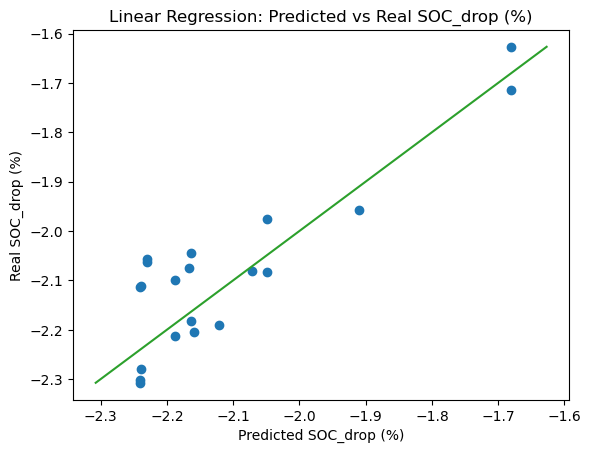

Best Parameters: {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
MAE: 0.0793986397067076
MAPE: 0.038296829887281385


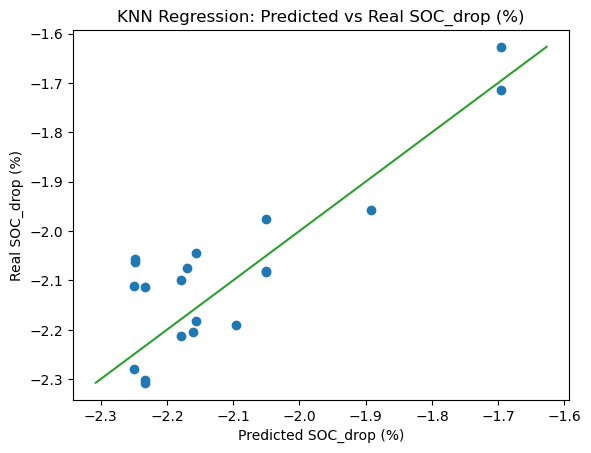

Best Parameters: {'max_depth': None, 'min_samples_split': 2}
MAE: 0.07715743343537063
MAPE: 0.037296479062358744


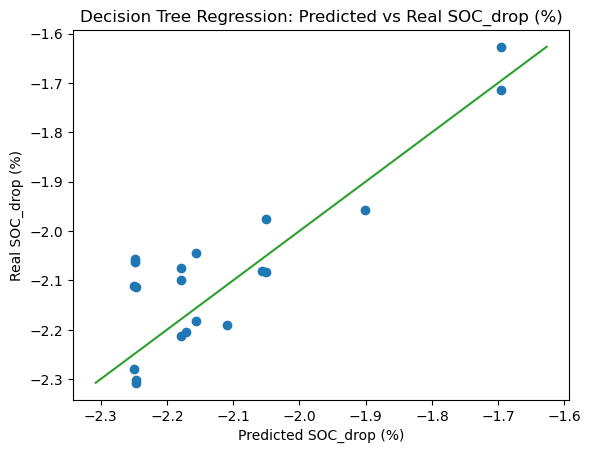

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 580}
MAE: 0.07685482436045614
MAPE: 0.03716066437672969


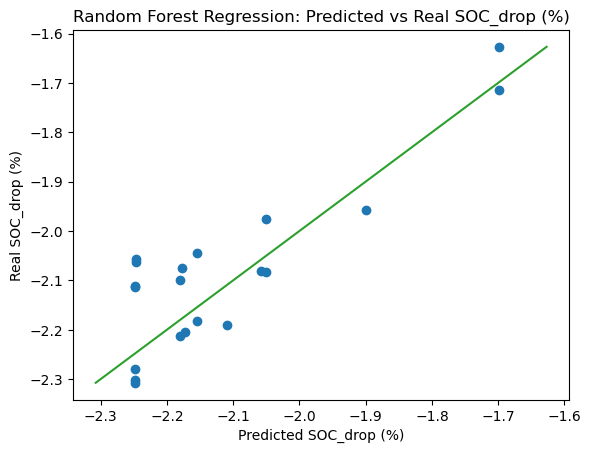

Best Parameters: {'alpha': 0.01, 'kernel': Matern(length_scale=1, nu=1.5), 'normalize_y': False}
MAE: 0.07274840923003077
MAPE: 0.03501246035183388


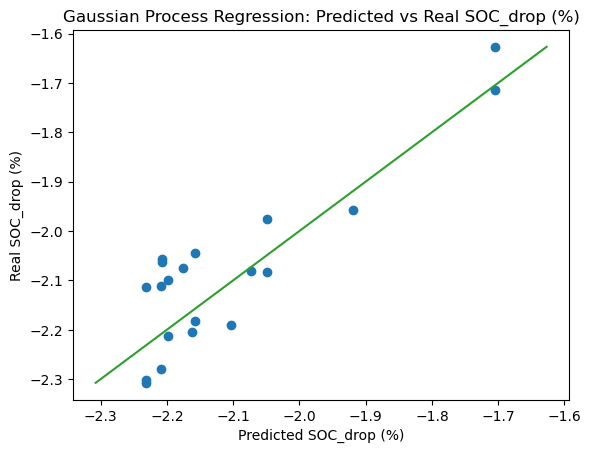

Extremely Randomized Trees Regression MAPE: 0.037296479062358986


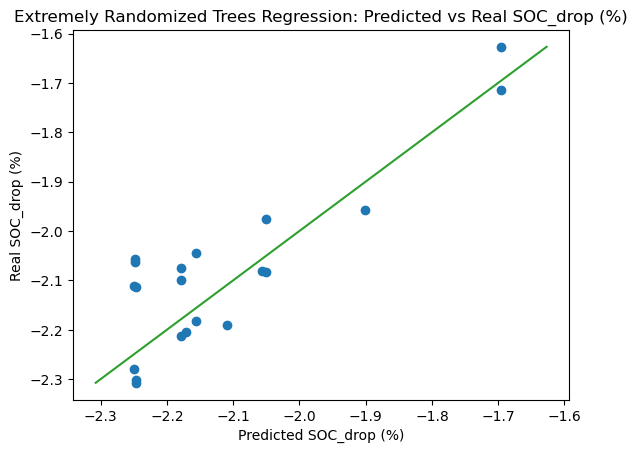

Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
MAE: 0.08790663292259157
MAPE: 0.04218015102537717


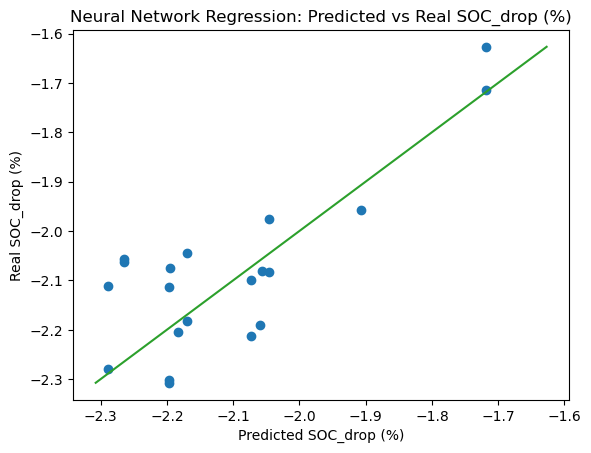

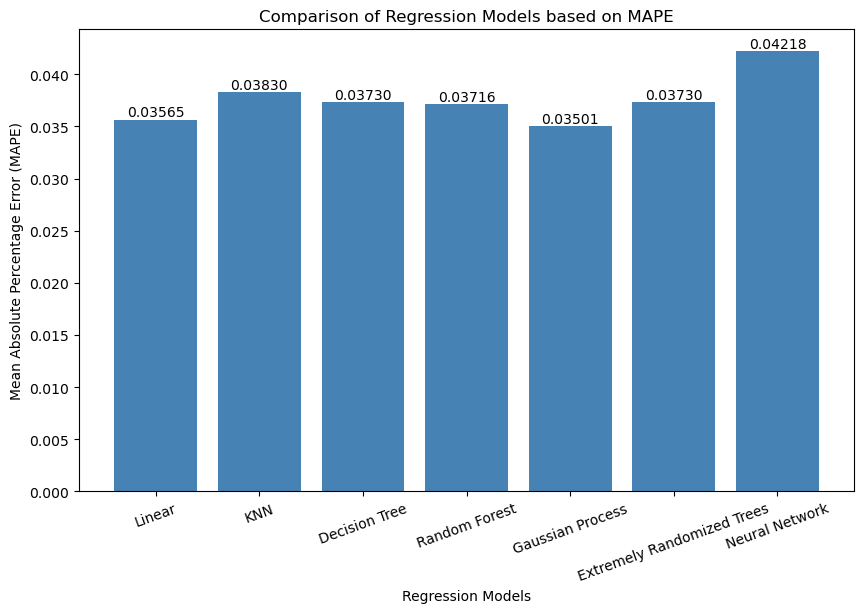

In [372]:
# Call the regression model functions with the selected features
linear_model, mape_linear = linear_regression(df_selected)
knn_model, mape_knn = knn_regression(df_selected)
dt_model, mape_dt = decision_tree_regression(df_selected)
rf_model, mape_rf = random_forest_regression(df_selected)
gp_model, mape_gp = gaussian_process_regression(df_selected)
extra_trees_model, mape_et = extra_trees_regression(df_selected)
Nn_model, mape_Nn = neural_network_regressor(df_selected)


# Plot the MAPE values in a bar chart for the comparation between ML models
models = ['Linear', 'KNN', 'Decision Tree', 'Random Forest', 'Gaussian Process', 'Extremely Randomized Trees','Neural Network']
mape_values = [mape_linear, mape_knn, mape_dt, mape_rf, mape_gp, mape_et, mape_Nn]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, mape_values, color='steelblue')

# Add specific value of MAPE on top of each bar for better visualization
for bar, mape in zip(bars, mape_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{mape:.5f}', ha='center', va='bottom')

plt.xlabel('Regression Models')
# Rotate x-axis labels
plt.xticks(rotation=20)
plt.ylabel('Mean Absolute Percentage Error (MAPE)')
plt.title('Comparison of Regression Models based on MAPE')
plt.show()